# SQLite Workshop

### Bitte führen Sie die nächsten beiden Codeabschnitte aus

In [ ]:
#Load Libraries
import sqlite3
import pandas as pd

# Load GitHub repo
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

In [ ]:
# Connect to Database
conn = sqlite3.connect('sqlite_workshop.db')
cursor = conn.cursor()
print("Opened database successfully");

# Delete table if exists 
cursor.execute("DROP TABLE IF EXISTS food")
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS animals")
cursor.execute("DROP TABLE IF EXISTS customer")
cursor.execute("DROP TABLE IF EXISTS customer_buys_food")
cursor.execute("DROP TABLE IF EXISTS employee")
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS food_new")
cursor.execute("DROP TABLE IF EXISTS customer_new")
cursor.execute("DROP TABLE IF EXISTS employee_new")
cursor.execute("DROP TABLE IF EXISTS Liga")
cursor.execute("DROP TABLE IF EXISTS Verein")
cursor.execute("DROP TABLE IF EXISTS Spieler")

# Create tables
cursor.execute('''
		CREATE TABLE IF NOT EXISTS Liga (
            L_name nvarchar(80) primary key,
            Anzahl_Vereine int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS Verein (
			V_name nvarchar(80) primary key,
            Liga nvarchar(80),
            Anzahl_Meisterschaften int,
            foreign key(Liga) references Liga(L_name)

			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS Spieler (
			S_name nvarchar(80) primary key,
            Verein nvarchar(80),
            foreign key(Verein) references Verein(V_name)

			)
               ''')

# fill tables for Part 1
cursor.execute('''
		INSERT INTO Liga (L_name,Anzahl_Vereine)
            VALUES
            ("1. Bundesliga", 18),
            ("2. Bundesliga", 18), 
            ("3. Bundesliga",20)

			
               ''')

cursor.execute('''
		INSERT INTO Verein (V_name, Liga, Anzahl_Meisterschaften)
            VALUES
            ("1. FC Bayern Muenchen", "1. Bundesliga", 32),
            ("2. FC Kaiserslautern", "3. Bundesliga", 4), 
            ( "SV Waldhof Mannheim", "3. Bundesliga", 0)

			
               ''')
cursor.execute('''
		INSERT INTO Spieler (S_name, Verein)
            VALUES
            ("Manuel Neuer","1. FC Bayern Muenchen"),
            ("Matheo Raab", "1. FC Kaiserslautern"), 
            ("Timo Koenigsmann", "SV Waldhof Mannheim")

			
               ''')


# Aufgabe zu Teil 1


## 1.1 Ersetze die Fragezeichen, um eine gültige PRAGMA Funktion zu nutzen
## 1.2 Zeichne anschließend ein ER-Diagramm

In [ ]:
# Tabellennamen herausfinden
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))


In [ ]:
# Private Keys herausfinden
print(pd.read_sql_query("???('???')", conn))
print("----------------------------------------")
print(pd.read_sql_query("???('???')", conn))
print("----------------------------------------")
print(pd.read_sql_query("???('???')", conn))

In [ ]:
# Foreign keys herausfinden
print(pd.read_sql_query("PRAGMA ???('???')", conn))
print("----------------------------------------")
print(pd.read_sql_query("PRAGMA ???('???')", conn))
print("----------------------------------------")
print(pd.read_sql_query("PRAGMA ???('???')", conn))

In [ ]:
print(pd.read_sql_query("SELECT * FROM Liga", conn))
print("----------------------------------------")
print(pd.read_sql_query("SELECT * FROM Verein", conn))
print("----------------------------------------")
print(pd.read_sql_query("SELECT * FROM Spieler", conn))

## Bitte führen Sie diesen Teil aus 

In [ ]:
# Daten einlesen
food = pd.read_csv('tables/initial_tables/Futter.csv', sep=";")
customer = pd.read_csv('tables/initial_tables/Kunden.csv', sep=";")
animals = pd.read_csv('tables/initial_tables/Tiere.csv', sep=";")
orders = pd.read_csv('tables/initial_tables/Order.csv', sep=";")
employee = pd.read_csv('tables/initial_tables/Verkaeufer.csv', sep=";")
customer_buys_food = pd.read_csv('tables/initial_tables/Customer_buys_Food.csv', sep=";")


# Tabellen erstellen
cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer (
			customer_ID int primary key,
            name nvarchar(50),
			postal_code nvarchar(5),
			city nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS employee (
			employee_ID int primary key,
            name nvarchar(50),
            gender nvarchar(1),
			wage int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			food_ID int primary key,
            name nvarchar(50),
			price_per_kg float,
            producer nvarchar(50),
            origin nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
            name nvarchar(50) primary key,
			food int,
			foreign key(food) references food(food_ID)
			)
               ''') 
cursor.execute('''
		CREATE TABLE IF NOT EXISTS orders (
            order_Nr int primary key,
            date Date,
            transact int
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer_buys_food (
            C_ID int,
            F_ID int,
			amount int,
            O_ID int,
            E_ID int,
            foreign key(C_ID) references customer(customer_ID)
			foreign key(F_ID) references food(food_ID)
            foreign key(O_ID) references orders(order_Nr)
            foreign key(E_ID) references employee(employee_ID)
			)
               ''') 

# Insert Dataframe in Table
customer.to_sql('customer', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
orders.to_sql('orders', conn, if_exists='append', index=False)
employee.to_sql('employee', conn, if_exists='append', index=False)
customer_buys_food.to_sql('customer_buys_food', conn, if_exists='append', index=False)

### Hiermit werden die Tabelleninhalte angezeigt

In [ ]:
print("Tabelle customer")
print(pd.read_sql_query("SELECT * FROM customer", conn))
print("--------------------------------------------------------")
print("Tabelle food")
print(pd.read_sql_query("SELECT * FROM food", conn))
print("--------------------------------------------------------")
print("Tabelle animals")
print(pd.read_sql_query("SELECT * FROM animals", conn))
print("--------------------------------------------------------")
print("Tabelle orders")
print(pd.read_sql_query("SELECT * FROM orders", conn))
print("--------------------------------------------------------")
print("Tabelle employee")
print(pd.read_sql_query("SELECT * FROM employee", conn))
print("--------------------------------------------------------")
print("Tabellen customer_buys_food")
print(pd.read_sql_query("SELECT * FROM customer_buys_food", conn))
print("--------------------------------------------------------")

# Aufgaben zu Teil 2

## ER-Diagramm

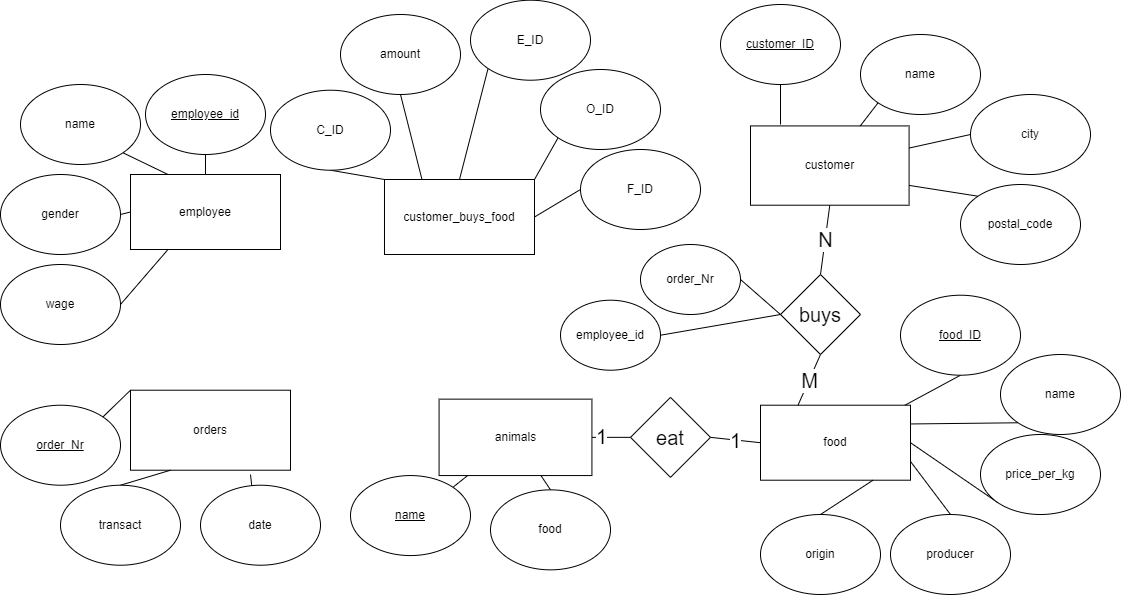

## SUBSELECTS

#### Beispiel: Welche Kunden (C_ID) haben Futter gekauft, das in China hergestellt wurde?

In [ ]:
print(pd.read_sql_query('''
    SELECT C_ID 
    FROM customer_buys_food
    WHERE F_ID =
       (SELECT food_ID FROM food WHERE origin == 'China')
    ''', conn))

### Aufgabe 2.1: Welche Bestellungen (O_ID) wurden von den Verkäufern abgewickelt, die mehr als 2000 verdienen?

In [ ]:
print(pd.read_sql_query('''
     SELECT O_ID 
     FROM customer_buys_food
     WHERE E_ID IN
       (SELECT employee_ID FROM employee WHERE employee.wage > 2000)
     ''', conn))

### Aufgabe 2.2: Welche Kunden (name) haben Futter von weiblichen Verkäufern verkauft bekommen?

In [ ]:
print(pd.read_sql_query('''
    SELECT name
    FROM customer
    WHERE customer_ID IN (
        SELECT C_ID
        FROM customer_buys_food
        WHERE E_ID IN (
            SELECT employee_ID 
            FROM employee 
            WHERE gender == 'w')
        )
    ''', conn))

## JOINS

#### Beispiel: Welcher Verkäufer hat am meisten Umsatz erwirtschaftet?

In [ ]:
print(pd.read_sql_query('''
    SELECT 
    employee.name as employee, employee.employee_ID, customer_buys_food.amount, food.price_per_kg,
    food.price_per_kg*customer_buys_food.amount as sum_sales
    FROM employee
    LEFT JOIN 
        customer_buys_food  ON employee.employee_ID = customer_buys_food.E_ID
    INNER JOIN 
        food ON customer_buys_food.F_ID = food.food_ID 
    GROUP BY employee.name
    ORDER BY sum_sales DESC
    ''', conn))

### Aufgabe 2.3: Welcher Verkäufer hat am häufigsten Futter verkauft? Zeigen Sie seinen Namen, seine ID und sein Gehalt an.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee.employee_ID, employee.name, employee.wage, COUNT(customer_buys_food.O_ID) as sum_sales
    FROM customer_buys_food
    LEFT JOIN 
        employee ON employee.employee_ID = customer_buys_food.E_ID
    GROUP BY customer_buys_food.E_ID
    ORDER BY sum_sales DESC
    ''', conn))

# Aufgaben zu Teil 3

In [ ]:
# Sternschema erstellen
#cursor.execute('''PRAGMA foreign_keys = OFF;''')  # disable foreign keys
#conn.commit()
cursor.execute('''CREATE TABLE IF NOT EXISTS food_new(
                  food_id INT PRIMARY KEY,
                  name TEXT,
                  price_per_kg FLOAT,
                  producer TEXT,
                  origin TEXT,
                  animal TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS customer_new(
                  cust_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  postal_code nvarchar(5),
                  city TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS employee_new(
                  empl_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  gender nvarchar(1),
                  wage INT
                  );''')
conn.commit()

# Tabellen mit Daten füllen
cursor.execute('''INSERT INTO food_new(food_id, name, price_per_kg, producer, origin)
                  SELECT food_ID, name, price_per_kg, producer, origin
                  FROM food;
                  ''')
conn.commit()
    
cursor.execute('''INSERT INTO employee_new(empl_id, name, gender, wage)
                  SELECT employee_ID, name, gender, wage
                  FROM employee;
                  ''')    
    
cursor.execute('''INSERT INTO customer_new(cust_id, name, postal_code, city)
                  SELECT customer_ID, name, postal_code, city
                  FROM customer;
                  ''')

conn.commit()

### INNER JOIN

SQLite INNER JOIN gibt die Datensätze zurück, bei denen sich table1 und table2 überschneiden.

In [ ]:
print(pd.read_sql_query('''
    SELECT animals.name,food.name as f_name 
    FROM animals 
    INNER JOIN 
        food ON animals.food = food.food_ID
    ''', conn))

###  LEFT JOIN

SQLite LEFT OUTER JOIN gibt alle Datensätze aus table1 und nur die Datensätze aus table2 zurück, die sich mit table1 überschneiden.

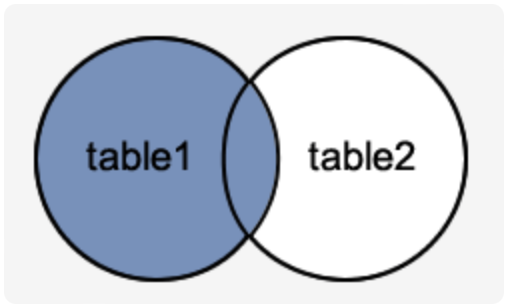

In [ ]:
print(pd.read_sql_query('''
    SELECT customer.name, customer_buys_food.amount FROM customer
    LEFT JOIN customer_buys_food ON customer.customer_ID = customer_buys_food.C_ID
    ''', conn))

In [ ]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales(
        order_nr  INT PRIMARY KEY NOT NULL UNIQUE,
        transact INT,
        date DATE,
        custumer_id int, 
        food_id INT,
        amount INT,
        employee_id INT,
            foreign key(food_id) references food_new(food_id),
            foreign key(custumer_id) references customer_new(cust_id),
            foreign key(employee_id) references employee_new(empl_id)
        );''')

In [ ]:
cursor.execute('''
    INSERT INTO sales( order_nr, transact, date, custumer_id, food_id, amount,employee_id )
    SELECT order_Nr,transact, date, C_ID, food_ID, amount, E_ID 
    FROM orders
    LEFT JOIN 
        customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN 
        food ON customer_buys_food.F_ID = food.food_ID;
    ''')

In [ ]:
print(pd.read_sql_query("SELECT * FROM sales", conn))

In [ ]:
cursor.execute(''' PRAGMA table_info(sales);''')
records = cursor.fetchall()

### Close connection

In [ ]:
#conn.close()